In [149]:
from dipdup import JusterDipDupClient

dd_client = JusterDipDupClient()

### Analysing juster dipdup events data:

In [150]:
import pandas as pd

all_events = dd_client.query_all_events()
df = pd.json_normalize(all_events)

In [151]:
df.iloc[0].created_time

Timestamp('2021-07-28 15:01:11.870875+0000', tz='tzutc()')

In [152]:
from time import time

now = pd.Timestamp(time(), unit='s')

### TODO: this method does not show daily events:
    - either replace request all events with requesting each line separately
    - either increase dipdup events count limit

In [153]:
curated_events = df[
    df['measure_period'].isin([3600, 21600, 86400])
    & df.target_dynamics.isin([1, 0.99, 1.01])
]

groupby = ['currency_pair.symbol', 'target_dynamics', 'measure_period']

last_event_stats = curated_events.sort_values('created_time').groupby(groupby).last()

last_event_stats['created_minutes_back'] = last_event_stats['created_time'].dt.tz_localize(None).map(
    lambda x: (now - x).seconds / 60)

last_event_stats

creator_id  \
currency_pair.symbol target_dynamics measure_period                                         
BTC-USD              0.99            3600            tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                                     21600           tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                     1.00            3600            tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                                     21600           tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                     1.01            3600            tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                                     21600           tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
ETH-USD              0.99            3600            tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                                     21600           tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                     1.00            3600            tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                                     21600           tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                     1.01            3600            tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                                     21600           tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
XTZ-USD              0.99            3600            tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                                     21600           tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                     1.00            3600            tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                                     21600           tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                     1.01            3600            tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   
                                     21600           tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu   

                                                                        created_time  \
currency_pair.symbol target_dynamics measure_period                                    
BTC-USD              0.99            3600           2021-07-28 15:01:11.858167+00:00   
                                     21600          2021-07-28 10:03:53.766381+00:00   
                     1.00            3600           2021-07-28 15:01:11.854608+00:00   
                                     21600          2021-07-28 10:02:06.622749+00:00   
                     1.01            3600           2021-07-28 15:01:11.861952+00:00   
                                     21600          2021-07-28 10:03:53.773032+00:00   
ETH-USD              0.99            3600           2021-07-28 15:01:11.868500+00:00   
                                     21600          2021-07-28 10:03:53.783997+00:00   
                     1.00            3600           2021-07-28 15:01:11.865432+00:00   
                                     21600          2021-07-28 10:03:53.781655+00:00   
                     1.01            3600           2021-07-28 15:01:11.870875+00:00   
                                     21600          2021-07-28 10:03:53.786333+00:00   
XTZ-USD              0.99            3600           2021-07-28 15:01:11.845808+00:00   
                                     21600          2021-07-28 10:02:06.607868+00:00   
                     1.00            3600           2021-07-28 15:01:11.836815+00:00   
                                     21600          2021-07-28 10:02:06.604246+00:00   
                     1.01            3600           2021-07-28 15:01:11.849893+00:00   
                                     21600          2021-07-28 10:02:06.611716+00:00   

                                                              bets_close_time  \
currency_pair.symbol target_dynamics measure_period                             
BTC-USD              0.99            3600           2021-07-28 16:00:00+00:00   
                                     21600          2021-07-28 16:00:00+00:00   
                     1.00            3600           2021-07-28 16:00:00+00:00   
                                     21600          

In [154]:
df[
    (df['currency_pair.symbol'] == 'XTZ-USD')
    & (df['target_dynamics'] == 1.00)
    & (df['measure_period'] == 3600)
].sort_values('created_time')

,creator_id,created_time,bets_close_time,id,measure_period,target_dynamics,pool_above_eq,pool_below,currency_pair.symbol
98,tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu,2021-07-28 05:00:58.773523+00:00,2021-07-28 06:00:00+00:00,1637,3600,1.0,1.0,1.0,XTZ-USD
89,tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu,2021-07-28 06:02:00.457378+00:00,2021-07-28 07:00:00+00:00,1646,3600,1.0,1.0,1.0,XTZ-USD
80,tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu,2021-07-28 07:02:02.091090+00:00,2021-07-28 08:00:00+00:00,1655,3600,1.0,1.0,1.0,XTZ-USD
71,tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu,2021-07-28 08:01:22.393176+00:00,2021-07-28 09:00:00+00:00,1664,3600,1.0,1.0,1.0,XTZ-USD
62,tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu,2021-07-28 09:01:35.424521+00:00,2021-07-28 10:00:00+00:00,1673,3600,1.0,1.0,1.0,XTZ-USD
53,tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu,2021-07-28 10:02:06.590368+00:00,2021-07-28 11:00:00+00:00,1682,3600,1.0,1.0,1.0,XTZ-USD
35,tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu,2021-07-28 11:22:13.784069+00:00,2021-07-28 12:00:00+00:00,1700,3600,1.0,1.0,1.0,XTZ-USD
26,tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu,2021-07-28 12:01:42.142521+00:00,2021-07-28 13:00:00+00:00,1709,3600,1.0,1.0,1.0,XTZ-USD
17,tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu,2021-07-28 14:01:42.800472+00:00,2021-07-28 15:00:00+00:00,1718,3600,1.0,1.0,1.0,XTZ-USD
8,tz1fvzdyC7s4mMhBrmG38kasaZjE9PHPgFEu,2021-07-28 15:01:11.836815+00:00,2021-07-28 16:00:00+00:00,1727,3600,1.0,1.0,1.0,XTZ-USD


### Withdrawable events check:

In [155]:
events = dd_client.query_withdrawable_events('2021-07-27 24:00')
len(events)

74

<AxesSubplot:>

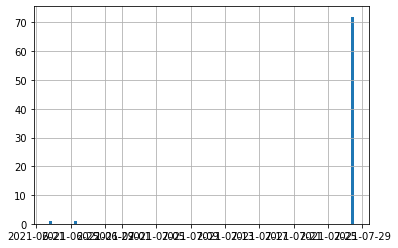

In [156]:
# events[-1]['closed_oracle_time']
close_times = pd.DataFrame(events).closed_oracle_time.map(pd.Timestamp)
close_times.hist(bins=100)

### Query withdrawable events sum:

In [157]:
from tqdm import tqdm

query = """
query MyQuery($offset: Int = 0) {
  juster_event(offset: $offset) {
    positions {
      liquidity_provided_above_eq
      liquidity_provided_below
      reward_above_eq
      reward_below
      shares
      withdrawn
    }
    id
    winner_bets
    total_liquidity_shares
    closed_oracle_time
  }
}
"""


def deep_dd_query(query, process, max_depth=100, limit_size=100):

    data = []

    for query_num in tqdm(range(max_depth)):
        raw_data = dd_client.endpoint(query, {'offset': query_num*limit_size})
        processed_data = process(raw_data)
        data += processed_data
        if not len(processed_data):
            break

    return data


events_data = deep_dd_query(query, lambda d: d['data']['juster_event'])

 18%|█▊        | 18/100 [00:09<00:44,  1.85it/s]


In [163]:
positions = [
    {**position, **event}
    for event in events_data
    for position in event.pop('positions')
]

df = pd.DataFrame(positions)
len(df)

862

In [165]:
df['winner_bets'].value_counts()

ABOVE_EQ    345
BELOW       308
Name: winner_bets, dtype: int64

In [214]:
def calculate_return(position, winner_bets):

    loan = min(position.liquidity_provided_below, position.liquidity_provided_above_eq)
    share = position.shares / position.total_liquidity_shares

    if winner_bets == 'BELOW':
        return (
            position.liquidity_provided_below
            + position.liquidity_provided_above_eq * share
            - loan
            + position.reward_below
        )
    elif winner_bets == 'ABOVE_EQ':
        return (
            position.liquidity_provided_above_eq
            + position.liquidity_provided_below * share
            - loan
            + position.reward_above_eq
        )
    else:
        raise Exception('Unexpected winner_bets param')


df['position_return_above_eq'] = df.apply(
    lambda position: calculate_return(position, 'ABOVE_EQ'),
    axis=1)

df['position_return_below'] = df.apply(
    lambda position: calculate_return(position, 'BELOW'),
    axis=1)

In [215]:
df.groupby('withdrawn').position_return_above_eq.sum()

withdrawn
False    555.371410
True     584.170546
Name: position_return_above_eq, dtype: float64

In [216]:
df.groupby('withdrawn').position_return_below.sum()

withdrawn
False    549.716835
True     558.395690
Name: position_return_below, dtype: float64

In [168]:
positions_in_events = df.id.value_counts().sort_index()
ids = [x for x in range(positions_in_events.index.max())]

positions_in_events = positions_in_events.reindex(ids)
events_without_position = positions_in_events[ positions_in_events.isna() ]

In [169]:
len(events_without_position)

929

### OK: all provided liquidity + all bets - all withdrawals:

In [176]:
all_bets_query = """
query MyQuery($offset: Int = 0) {
  juster_bet(offset: $offset) {
    amount
  }
}
"""

all_bets = deep_dd_query(all_bets_query, lambda d: d['data']['juster_bet'])
sum_all_bets = pd.DataFrame(all_bets).sum().amount

all_liquidity_query = """
query MyQuery($offset: Int = 0) {
  juster_deposit(offset: $offset) {
    amount_above_eq
    amount_below
  }
}
"""
all_liquidity = deep_dd_query(all_liquidity_query, lambda d: d['data']['juster_deposit'])
all_liquidity_df = pd.DataFrame(all_liquidity)
all_liquidity_df['deposit'] = all_liquidity_df.sum(axis=1) - all_liquidity_df.min(axis=1)
sum_all_liquidity = all_liquidity_df['deposit'].sum()

all_withdrawals_query = """
query MyQuery($offset: Int = 0) {
  juster_withdrawal(offset: $offset) {
    amount
  }
}
"""
all_withdrawals = deep_dd_query(all_withdrawals_query, lambda d: d['data']['juster_withdrawal'])
all_withdrawals_df = pd.DataFrame(all_withdrawals)
withdrawals_sum = all_withdrawals_df.sum().amount

  5%|▌         | 5/100 [00:01<00:30,  3.08it/s]


In [181]:
sum_all_liquidity + sum_all_bets - withdrawals_sum

680.167661

In [183]:
withdrawals_sum

608.034339

### why delta == 680 tez and it is more that should be removed by positions (225)?
### why withdrawals_sum == 608 tez and withdrawn by positions is only 518?
### why contract balance is 732.852006, when calculated delta is 680.167661
    - this can be because some events holds 0.2 tez used to start/close and I need to run force majeure

### ALL POSITIONS:

In [301]:
query_positions = """
query MyQuery($offset: Int = 0) {
  juster_position(offset: $offset) {
    event {
      closed_oracle_time
      id
      total_liquidity_shares
      winner_bets
      measure_oracle_start_time
      bets_close_time
      measure_period
      created_time
      creator {
        address
      }
    }
    liquidity_provided_above_eq
    liquidity_provided_below
    reward_above_eq
    reward_below
    shares
    event_id
    withdrawn
  }
}
"""

all_positions = deep_dd_query(query_positions, lambda d: d['data']['juster_position'])

  9%|▉         | 9/100 [00:05<00:54,  1.67it/s]


In [302]:
df = pd.json_normalize(all_positions)
df = df.rename(columns={
    'event.total_liquidity_shares': 'total_liquidity_shares',
    'event.winner_bets': 'winner_bets'
})

df['calculated_return_above_eq'] = df.apply(
    lambda row: calculate_return(row, 'ABOVE_EQ'), axis=1)
df['calculated_return_below'] = df.apply(
    lambda row: calculate_return(row, 'BELOW'), axis=1)

In [303]:
df.groupby('withdrawn').calculated_return_below.sum()

withdrawn
False    542.716835
True     562.395690
Name: calculated_return_below, dtype: float64

### Agregate all unclosed events and how much liquidity are there?

In [304]:
import time


# TODO: drop timezone correctly plz:
def to_timestamp(string):
    if string:
        return pd.Timestamp(string.split(':')[0])

def to_timedelta(seconds):
    return pd.Timedelta(seconds=seconds)

df['event.bets_close_time'] = df['event.bets_close_time'].map(to_timestamp)
df['event.measure_oracle_start_time'] = df['event.measure_oracle_start_time'].map(to_timestamp)
df['event.measure_period'] = df['event.measure_period'].map(to_timedelta)
df['finish_time'] = df['event.measure_oracle_start_time'] + df['event.measure_period']

In [305]:
now = pd.Timestamp(time.time(), unit='s')

failed_to_start = df[
    (df['event.bets_close_time'] > now)
    & df['event.measure_oracle_start_time'].isna()
]
print(f'failed_to_start: {len(failed_to_start)}')

failed_to_finish = df[
    (df['finish_time'] > now)
    & df['event.closed_oracle_time'].isna()
]
print(f'failed_to_finish: {len(failed_to_finish)}')


failed_to_start: 25
failed_to_finish: 28


In [306]:
assert set(failed_to_start.index).intersection(set(failed_to_finish.index)) == set()

# failed_to_start.calculated_return_above_eq.sum()
faileds = pd.concat({'failed_to_start': failed_to_start, 'failed_to_finish': failed_to_finish}, names=['failtype', '_']).reset_index()
faileds.groupby(['failtype']).calculated_return_above_eq.sum()

failtype
failed_to_finish     27.001000
failed_to_start     112.740728
Name: calculated_return_above_eq, dtype: float64

In [307]:
faileds.groupby(['failtype']).calculated_return_below.sum()

failtype
failed_to_finish     27.001000
failed_to_start     120.169168
Name: calculated_return_below, dtype: float64

In [308]:
df[ ~df['withdrawn'] ].groupby(['event.bets_close_time']).calculated_return_below.sum().sort_index()#.sort_values(ascending=False)

event.bets_close_time
2021-06-22 11:00:00      0.000000
2021-06-25 15:00:00      0.000000
2021-07-02 14:00:00      0.001000
2021-07-15 12:00:00     41.546666
2021-07-23 16:00:00      9.000000
2021-07-23 17:00:00      9.000000
2021-07-23 22:00:00     24.000000
2021-07-23 23:00:00      9.000000
2021-07-24 04:00:00     12.000000
2021-07-24 10:00:00      3.000000
2021-07-24 22:00:00      9.000000
2021-07-25 23:00:00      9.000000
2021-07-26 00:00:00      9.000000
2021-07-26 16:00:00      9.000000
2021-07-26 17:00:00      9.000000
2021-07-26 22:00:00      9.000000
2021-07-27 16:00:00      9.000000
2021-07-27 18:00:00      9.000000
2021-07-27 19:00:00      9.000000
2021-07-27 20:00:00      9.000000
2021-07-27 21:00:00      9.000000
2021-07-27 22:00:00     36.000000
2021-07-27 23:00:00      9.000000
2021-07-28 00:00:00      9.000000
2021-07-28 01:00:00      9.000000
2021-07-28 02:00:00      9.000000
2021-07-28 03:00:00      9.000000
2021-07-28 04:00:00     18.000000
2021-07-28 05:00:00      9

- is event.created_time correct?

In [341]:
# df.sort_values('calculated_return_below', ascending=False)
df.groupby(['event.measure_period'])[['calculated_return_above_eq', 'calculated_return_below']].count()

,calculated_return_above_eq,calculated_return_below
event.measure_period,,
0 days 00:05:00,10,10
0 days 00:10:00,32,32
0 days 00:20:00,25,25
0 days 00:30:00,10,10
0 days 01:00:00,604,604
0 days 06:00:00,135,135
1 days 00:00:00,45,45
31 days 00:00:00,1,1


### Why there are so many 1-hour event positions?

In [318]:
hours = df[ df['event.measure_period'] == pd.Timedelta(seconds=60*60) ]

In [323]:
# Hypothesis: there are multiple times liquidity provided?
# - NO, only 2 cases:
by_events = pd.DataFrame({
    'above_eq_sum': hours.groupby('event_id').liquidity_provided_above_eq.sum(),
    'below_sum': hours.groupby('event_id').liquidity_provided_below.sum()
})

by_events[ by_events.above_eq_sum > 1 ]

,above_eq_sum,below_sum
event_id,,
841,2.0,2.0
842,2.0,2.0


In [329]:
# Hypothesis: there are multiple events in one hour?
hours.groupby('event.bets_close_time').event_id.count().sort_values(ascending=False)
# NO, only one with 10 events instead of 9

event.bets_close_time
2021-07-28 12:00:00    10
2021-07-23 16:00:00     9
2021-07-27 10:00:00     9
2021-07-27 19:00:00     9
2021-07-27 18:00:00     9
                       ..
2021-07-24 07:00:00     3
2021-07-24 08:00:00     3
2021-07-24 09:00:00     3
2021-07-24 10:00:00     3
2021-07-24 06:00:00     3
Name: event_id, Length: 75, dtype: int64

Oh, it is all right, all this events are withdrawn before:

In [332]:
hours.withdrawn.value_counts()

True     338
False    266
Name: withdrawn, dtype: int64

In [334]:
not_withdrawn = df[ ~df.withdrawn ]
not_withdrawn.groupby(['event.measure_period'])[['calculated_return_above_eq', 'calculated_return_below']].sum()

,calculated_return_above_eq,calculated_return_below
event.measure_period,,
0 days 00:05:00,67.944060,68.115201
0 days 00:10:00,39.755462,46.315251
0 days 00:20:00,28.719470,38.284383
0 days 00:30:00,20.453796,0.001000
0 days 01:00:00,268.497622,267.000000
0 days 06:00:00,72.000000,72.000000
1 days 00:00:00,51.000000,51.000000
31 days 00:00:00,0.001000,0.001000


In [339]:
days = not_withdrawn[ not_withdrawn['event.measure_period'] == pd.Timedelta(seconds=60*60*24) ]
days['event.bets_close_time'].value_counts()

2021-07-23 22:00:00    9
2021-07-24 22:00:00    9
2021-07-26 22:00:00    9
2021-07-27 22:00:00    9
2021-07-28 22:00:00    9
Name: event.bets_close_time, dtype: int64

### FINALLY: why event_id 653, 654 and some more are not withrawn?
- looks like it is unclosed events

In [337]:
9*4*2

72

In [335]:
9*24 + 9*4 + 9

261

### DONE?: Force majeure calls?
### TODO: withdraw canceled?

In [3]:
from event_lines import EventLines

event_lines = EventLines()
event_params = event_lines.generate_new()

In [18]:
import time
from datetime import datetime

next_hour_timestamp = int((time.time() // 3600 + 1) * 3600)
datetime.fromtimestamp(next_hour_timestamp).strftime('%Y-%m-%d %H:%M:%S')

'2021-07-22 01:00:00'

In [19]:
from tqdm import tqdm

for params in tqdm(event_params):
    params.update({
        'next_at': get_last_bets_close_timestamp(
            dd_client, params, next_hour_timestamp)
    })

 15%|█▍        | 4/27 [00:02<00:11,  1.95it/s]

last bets close timestamp is not found: {'currency_pair': 'XTZ-USD', 'target_dynamics': 1.0, 'bets_period': 21600, 'measure_period': 21600, 'liquidity_percent': 0.01, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 19%|█▊        | 5/27 [00:02<00:11,  1.95it/s]

last bets close timestamp is not found: {'currency_pair': 'XTZ-USD', 'target_dynamics': 0.99, 'bets_period': 21600, 'measure_period': 21600, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 22%|██▏       | 6/27 [00:03<00:10,  1.95it/s]

last bets close timestamp is not found: {'currency_pair': 'XTZ-USD', 'target_dynamics': 1.01, 'bets_period': 21600, 'measure_period': 21600, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 26%|██▌       | 7/27 [00:03<00:10,  1.95it/s]

last bets close timestamp is not found: {'currency_pair': 'XTZ-USD', 'target_dynamics': 1.0, 'bets_period': 86400, 'measure_period': 86400, 'liquidity_percent': 0.01, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 30%|██▉       | 8/27 [00:04<00:09,  1.97it/s]

last bets close timestamp is not found: {'currency_pair': 'XTZ-USD', 'target_dynamics': 0.99, 'bets_period': 86400, 'measure_period': 86400, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 33%|███▎      | 9/27 [00:04<00:09,  1.95it/s]

last bets close timestamp is not found: {'currency_pair': 'XTZ-USD', 'target_dynamics': 1.01, 'bets_period': 86400, 'measure_period': 86400, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 48%|████▊     | 13/27 [00:06<00:07,  1.97it/s]

last bets close timestamp is not found: {'currency_pair': 'BTC-USD', 'target_dynamics': 1.0, 'bets_period': 21600, 'measure_period': 21600, 'liquidity_percent': 0.01, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 52%|█████▏    | 14/27 [00:07<00:06,  1.96it/s]

last bets close timestamp is not found: {'currency_pair': 'BTC-USD', 'target_dynamics': 0.99, 'bets_period': 21600, 'measure_period': 21600, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 56%|█████▌    | 15/27 [00:07<00:06,  1.97it/s]

last bets close timestamp is not found: {'currency_pair': 'BTC-USD', 'target_dynamics': 1.01, 'bets_period': 21600, 'measure_period': 21600, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 59%|█████▉    | 16/27 [00:08<00:05,  1.98it/s]

last bets close timestamp is not found: {'currency_pair': 'BTC-USD', 'target_dynamics': 1.0, 'bets_period': 86400, 'measure_period': 86400, 'liquidity_percent': 0.01, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 63%|██████▎   | 17/27 [00:08<00:05,  1.94it/s]

last bets close timestamp is not found: {'currency_pair': 'BTC-USD', 'target_dynamics': 0.99, 'bets_period': 86400, 'measure_period': 86400, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 67%|██████▋   | 18/27 [00:09<00:04,  1.94it/s]

last bets close timestamp is not found: {'currency_pair': 'BTC-USD', 'target_dynamics': 1.01, 'bets_period': 86400, 'measure_period': 86400, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 81%|████████▏ | 22/27 [00:11<00:02,  1.95it/s]

last bets close timestamp is not found: {'currency_pair': 'ETH-USD', 'target_dynamics': 1.0, 'bets_period': 21600, 'measure_period': 21600, 'liquidity_percent': 0.01, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 85%|████████▌ | 23/27 [00:11<00:02,  1.96it/s]

last bets close timestamp is not found: {'currency_pair': 'ETH-USD', 'target_dynamics': 0.99, 'bets_period': 21600, 'measure_period': 21600, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 89%|████████▉ | 24/27 [00:12<00:01,  1.95it/s]

last bets close timestamp is not found: {'currency_pair': 'ETH-USD', 'target_dynamics': 1.01, 'bets_period': 21600, 'measure_period': 21600, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 93%|█████████▎| 25/27 [00:12<00:01,  1.96it/s]

last bets close timestamp is not found: {'currency_pair': 'ETH-USD', 'target_dynamics': 1.0, 'bets_period': 86400, 'measure_period': 86400, 'liquidity_percent': 0.01, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


 96%|█████████▋| 26/27 [00:13<00:00,  1.94it/s]

last bets close timestamp is not found: {'currency_pair': 'ETH-USD', 'target_dynamics': 0.99, 'bets_period': 86400, 'measure_period': 86400, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


100%|██████████| 27/27 [00:13<00:00,  1.95it/s]

last bets close timestamp is not found: {'currency_pair': 'ETH-USD', 'target_dynamics': 1.01, 'bets_period': 86400, 'measure_period': 86400, 'liquidity_percent': 0.02, 'expiration_fee': 100000, 'measure_start_fee': 100000, 'next_at': 0}, using default timestamp = 1626904800


### TODO: tests using mocked dipdup

last bets close timestamp is not found: {'currency_pair': 'XTZ-USD', 'target_dynamics': 1.0, 'bets_period': 21600, 'measure_period': 21600, 'liquidity_percent': 0.01, 'expiration_fee': 100000, 'measure_start_fee': 100000}, using default timestamp = 0


0

### TODO: maybe it is better not to have created date but the bets_close_time?
- if measure_period == bets_close_time, then next event should be runned at measure_period time

In [10]:
date.timestamp()

1626901200.0

- можем ли мы проверять кто создавал ивенты? чтобы чужие ивенты не сдвигали нашу сетку?
    - как-то бы валидировать список запрошенных ивентов и брать только наши
- можем ли мы проверять время создания ивента? потому что сейчас у нас есть пара ивентов где measure_period 1800 которые висят в далёком будущем

In [48]:
event_lines.event_params[0]

{'currency_pair': 'XTZ-USD',
 'target_dynamics': 3600,
 'bets_period': 3600,
 'measure_period': 3600,
 'liquidity_percent': 10000,
 'expiration_fee': 100000,
 'measure_start_fee': 100000}

In [49]:



def event_type_name(event):
    """ Returns event line name identifier for given event data
        - supports both event from EventLines and event from dipdup
    """

event = events[0]

# bets_period calculated for data from juster-dipdup:
bets_period = (
    if not 'bets_period' in event else event['bets_period'])

measure_period = event['measure_period']

# currency_pair stored in 'symbol' key in juster-dipdup:
currency_pair = event['currency_pair']
currency_pair = currency_pair['symbol'] if 'symbol' in currency_pair

SyntaxError: invalid syntax (<ipython-input-49-c97c57da31c6>, line 10)

### DipDup:
1. Должен отвечать на вопрос, когда последний раз был создан ивент с определёнными параметрами
2. Должен отвечать на вопрос, успешно ли был создан ивент с определёнными параметрами

In [ ]:


def calculate_bets_period(event):
    """ Returns bets period in seconds for given event requested
        from dipdup
    """

    bets_close_time = parse(event['bets_close_time'])
    created_time = parse(event['created_time'])
    return (bets_close_time - created_time).seconds


class EventLine:
    """ Represent one line of the events with the same type. Can be created
        from dipdup response and from simplified dict that used to store this lines
    """

    TARGET_RATE_PRECISION = 10**6


    def __init__(self, currency_pair, measure_period, bets_period, target_rate):
        self.currency_pair = currency_pair
        self.measure_period = measure_period
        self.bets_period = bets_period
        self.target_rate = target_rate


    @classmethod
    def from_dipdup(cls, event):
        return cls(
            currency_pair=event['currency_pair']['symbol'],
            measure_period=event['measure_period'],
            bets_period=calculate_bets_period(event),
            target_rate=int(event['target_rate']*self.TARGET_RATE_PRECISION)
        )


    @classmethod
    def from_dict(cls, event):
        return cls(
            currency_pair=event['currency_pair'],
            measure_period=event['measure_period'],
            bets_period=event['bets_period'],
            target_rate=event['target_rate']
        )

In [ ]:
def dipdup_event_to_

In [44]:
event['target_dynamics']

0.0

In [42]:
f'{currency_pair}_{measure_period}_{target_rate}'

NameError: name 'target_rate' is not defined

In [15]:
event

{'created_time': '2021-07-04T19:05:58.051943+00:00',
 'bets_close_time': '2021-08-02T13:20:00+00:00',
 'id': 16,
 'currency_pair': {'symbol': 'XTZ-USD'},
 'measure_period': 1800,
 'target_dynamics': 0.0}

### Определение времени когда ивенты были созданы в последний раз: